# Integral apporximations
TO start we choose the function $ f(x) = x^2 + \sin(x) $


Lets start with defining the function and its antiderivative
 $F(x) = x^3 / 3 - \cos(x)$


In [59]:
import numpy as np 
import matplotlib.pyplot as plt 

def f(x):
    return x**2 + np.sin(x)

def F(x):
    return (x**3)/3 - np.cos(x)
    

Now we need to choose integration bounds and step sizes

In [60]:
a = 0
b = 2

step_sizes = [0.2, 0.1, 0.05]

Calculate the exact integral

In [61]:
exact_int = F(b) - F(a)
print(f"Exact integral: {exact_int}")

Exact integral: 4.082813503213809


### Riemann Sum
we divide [a,b] into n recnangles of width h

In [62]:
def riemann(x,h):
    y_vals = f(x[:-1]) # f(x_0), f(x_1), ..., f(x_(n-1))
    
    integral_approx = np.sum(y_vals) * h
    return integral_approx


### Trapezoid Rule 
We approximate integral by conncecting consecutvie points with straight line to form trapezoids. the area of each trapezoid is

 $ = h/2 * [f(x_0) + 2f(x_1) + 2f(x_2) + ... + 2 f(x_{n-1}) + f(x_n)]$

In [63]:
def trapezoid(x,h):
    y_vals = f(x) # f(x_0), f(x_1), ..., f(x_n)
    
    integral_approx = (h/2) * (y_vals[0] + 2*np.sum(y_vals[1:-1]) + y_vals[-1])
    return integral_approx

### Simpson's Rule
we approximate by fitting parabolas through 3 consecutive points
Formula:

 $$ (h/3) × [f(x₀) + 4f(x₁) + 2f(x₂) + 4f(x₃) + 2f(x₄) + ... + 4f(xₙ₋₁) + f(xₙ)]$$


In [ ]:
def simpson(x,h):
    y_vals = f(x) # f(x_0), f(x_1), ..., f(x_n)
    n = len(y_vals)
    integral_approx = y_vals[0] + y_vals[-1] # first and last terms have coef 1

    for i in range (1, n-1):
        if i % 2 == 0: # even 
            integral_approx += 2 * y_vals[i]
        else: # odd 
            integral_approx += 4 * y_vals[i]
            
    return integral_approx*(h/3)

In [65]:
riemannRes = []
trapezoidRes = []
simpsonRes = []
actual_step_sizes =  []

for h in step_sizes:
    n = int((b - a) / h) 
    if n % 2 == 1:
        n+=1

    h_actual = (b - a) / n
    actual_step_sizes.append(h_actual)

    n_points = n + 1
    x = np.linspace(a, b, n_points)

    riemannRes.append(riemann(x, h_actual))
    trapezoidRes.append(trapezoid(x, h_actual))
    simpsonRes.append(simpson(x, h_actual))

    

print(f"\nExact integral value: {exact_int:.6f}")   
print(f"Step sizes: {actual_step_sizes}")
print(f"Riemann: {riemannRes}")
print(f"Trapezoid: {trapezoidRes}")
print(f"Simpson: {simpsonRes}")


Exact integral value: 4.082814
Step sizes: [0.2, 0.1, 0.05]
Riemann: [3.6004934544163114, 3.839501646108167, 3.960619357991881]
Trapezoid: [4.091423197098879, 4.084966517449451, 4.083351793662522]
Simpson: [4.082826151381206, 4.082814290899642, 4.0828135524002125]


### Error calculation
We convert to numpy arrays to make the calculations easier

In [68]:
riemannRes = np.array(riemannRes)
trapezoidRes = np.array(trapezoidRes)
simpsonRes = np.array(simpsonRes)
actual_step_sizes = np.array(actual_step_sizes)

riemann_errors = np.abs(riemannRes - exact_int)
trapezoid_errors = np.abs(trapezoidRes - exact_int)
simpson_errors = np.abs(simpsonRes - exact_int)
print("\nStep Size | Riemann Error | Trapezoid Error| Simpson Error")
for i in range(len(actual_step_sizes)):
    print(f"{actual_step_sizes[i]:.4f}    | {riemann_errors[i]:.8f}    | {trapezoid_errors[i]:.8f}     | {simpson_errors[i]:.8f}")



Step Size | Riemann Error | Trapezoid Error| Simpson Error
0.2000    | 0.48232005    | 0.00860969     | 0.00001265
0.1000    | 0.24331186    | 0.00215301     | 0.00000079
0.0500    | 0.12219415    | 0.00053829     | 0.00000005


### Plot


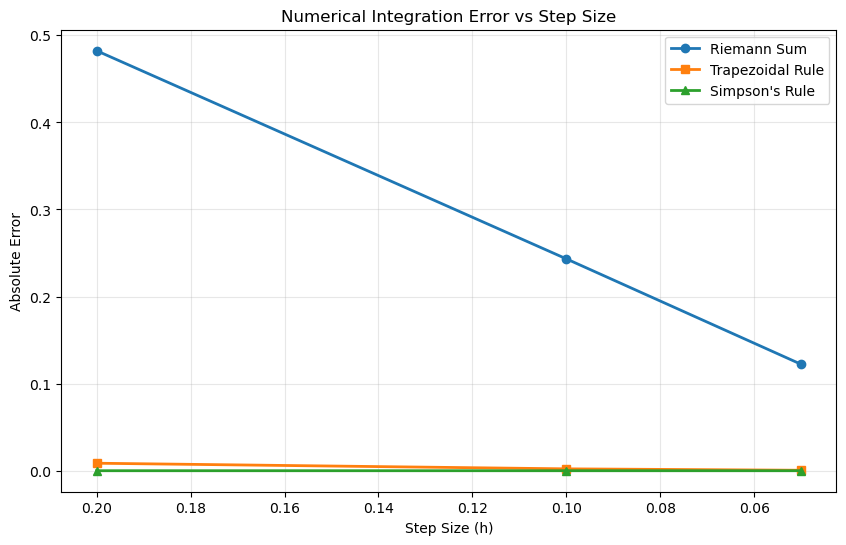

In [69]:
plt.figure(figsize=(10, 6))

plt.plot(actual_step_sizes, riemann_errors, 'o-', label='Riemann Sum', linewidth=2)
plt.plot(actual_step_sizes, trapezoid_errors, 's-', label='Trapezoidal Rule', linewidth=2)
plt.plot(actual_step_sizes, simpson_errors, '^-', label="Simpson's Rule", linewidth=2)

plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
plt.title('Numerical Integration Error vs Step Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Smaller step sizes on the right
plt.show()

We can notice that the simpsons methode is the most accurate, and maintains it all over the step sizes.
the trapezoidal approximation gives also a good approximation howerver it is not as precise as the simpsons approximation. 
THE Riemann sum is the least accurate of the 3, as it has large errors, however as step sizes decrease the error decreases significanly with it.